In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

pd.set_option("display.max_columns",None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/JohnnyBlaze/data/fires.csv', parse_dates=True)

In [3]:
df2 = pd.read_csv('/Users/JohnnyBlaze/data/weather.csv', parse_dates=True)

In [4]:
df.head()

,ContainmentDateTime,ControlDateTime,DiscoveryAcres,EstimatedCostToDate,FinalAcres,FireBehaviorGeneral,FireBehaviorGeneral1,FireBehaviorGeneral2,FireBehaviorGeneral3,FireCause,FireCauseGeneral,FireCauseSpecific,FireDiscoveryDateTime,FireOutDateTime,GACC,IncidentName,IncidentShortDescription,InitialLatitude,InitialLongitude,IsFireCauseInvestigated,IsTrespass,POOCity,POOState,PredominantFuelModel,PrimaryFuelModel
0,NaN,NaN,0.10,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,2020/02/28 20:45:40+00,NaN,OSCC,LAC-066100,NaN,33.808980,-118.18070,NaN,NaN,NaN,US-CA,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019/07/01 19:54:00+00,NaN,OSCC,SYCAMORE,NaN,NaN,NaN,NaN,0.0,NaN,US-CA,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016/06/20 22:05:59+00,NaN,ONCC,RATTLESNAKE,NaN,NaN,NaN,NaN,0.0,NaN,US-CA,NaN,NaN
3,NaN,NaN,0.10,NaN,NaN,NaN,NaN,NaN,NaN,Undetermined,NaN,NaN,2021/11/25 15:17:32+00,NaN,OSCC,E 4TH ST /S D ST,NaN,33.782437,-117.22858,NaN,0.0,NaN,US-CA,NaN,NaN
4,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Undetermined,NaN,NaN,2022/11/21 11:25:33+00,NaN,OSCC,LAC-396331,NaN,33.941810,-118.30902,NaN,NaN,NaN,US-CA,NaN,NaN


In [5]:
df2.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,DT00,DT00_ATTRIBUTES,DT32,DT32_ATTRIBUTES,DX32,DX32_ATTRIBUTES,DX70,DX70_ATTRIBUTES,DX90,DX90_ATTRIBUTES,EMNT,EMNT_ATTRIBUTES,EMXT,EMXT_ATTRIBUTES,HDSD,HDSD_ATTRIBUTES,HTDD,HTDD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,USR0000CABS,1995-01,40.3983,-122.8333,579.1,"ARBUCKLE BASIN CALIFORNIA, CA US",0.0,U,0.0,"2,U",0.0,"2,U",6.0,"2,U",7.0,",U",0.0,",U",0.0,",U",-6.1,"2,U,07,",11.1,",U,31,",NaN,NaN,423.9,",U",3.48,"2,U",4.73,",,,U",2.23,"2,,,U"
1,USR0000CABS,1995-02,40.3983,-122.8333,579.1,"ARBUCKLE BASIN CALIFORNIA, CA US",0.0,U,0.0,",U",0.0,",U",0.0,",U",0.0,",U",1.0,",U",0.0,",U",1.1,",U,14,",21.7,",U,22,",NaN,NaN,204.4,",U",11.03,",U",14.43,",,,U",7.64,",,,U"
2,USR0000CABS,1995-03,40.3983,-122.8333,579.1,"ARBUCKLE BASIN CALIFORNIA, CA US",0.0,U,0.0,",U",0.0,",U",9.0,",U",0.0,",U",0.0,",U",0.0,",U",-3.9,",U,06,+",18.9,",U,30,",NaN,NaN,374.8,",U",6.24,",U",9.56,",,,U",2.92,",,,U"
3,USR0000CABS,1995-04,40.3983,-122.8333,579.1,"ARBUCKLE BASIN CALIFORNIA, CA US",0.3,U,0.3,",U",0.0,",U",0.0,",U",0.0,",U",4.0,",U",0.0,",U",3.3,",U,15,",22.2,",U,24,+",NaN,NaN,197.3,",U",11.77,",U",15.80,",,,U",7.74,",,,U"
4,USR0000CABS,1995-05,40.3983,-122.8333,579.1,"ARBUCKLE BASIN CALIFORNIA, CA US",23.1,U,22.8,",U",0.0,",U",0.0,",U",0.0,",U",13.0,",U",0.0,",U",3.3,",U,12,",29.4,",U,29,",NaN,NaN,133.5,",U",14.76,",U",19.31,",,,U",10.21,",,,U"


In [6]:
fires = df.copy()
weather = df2.copy()

In [7]:
fires.shape 

(89162, 25)

In [8]:
weather.shape

(175300, 34)

In [9]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89162 entries, 0 to 89161
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ContainmentDateTime       35315 non-null  object 
 1   ControlDateTime           32570 non-null  object 
 2   DiscoveryAcres            72195 non-null  float64
 3   EstimatedCostToDate       2128 non-null   float64
 4   FinalAcres                2631 non-null   float64
 5   FireBehaviorGeneral       1498 non-null   object 
 6   FireBehaviorGeneral1      1223 non-null   object 
 7   FireBehaviorGeneral2      1164 non-null   object 
 8   FireBehaviorGeneral3      910 non-null    object 
 9   FireCause                 77967 non-null  object 
 10  FireCauseGeneral          7825 non-null   object 
 11  FireCauseSpecific         2404 non-null   object 
 12  FireDiscoveryDateTime     89162 non-null  object 
 13  FireOutDateTime           32551 non-null  object 
 14  GACC  

In [10]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175300 entries, 0 to 175299
Data columns (total 34 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   STATION          175300 non-null  object 
 1   DATE             175300 non-null  object 
 2   LATITUDE         175300 non-null  float64
 3   LONGITUDE        175300 non-null  float64
 4   ELEVATION        175300 non-null  float64
 5   NAME             175300 non-null  object 
 6   CDSD             148117 non-null  float64
 7   CDSD_ATTRIBUTES  143784 non-null  object 
 8   CLDD             174374 non-null  float64
 9   CLDD_ATTRIBUTES  174374 non-null  object 
 10  DT00             174954 non-null  float64
 11  DT00_ATTRIBUTES  174954 non-null  object 
 12  DT32             174954 non-null  float64
 13  DT32_ATTRIBUTES  174954 non-null  object 
 14  DX32             175086 non-null  float64
 15  DX32_ATTRIBUTES  175086 non-null  object 
 16  DX70             175086 non-null  floa

In [11]:
fires.nunique()

ContainmentDateTime         33108
ControlDateTime             30401
DiscoveryAcres                348
EstimatedCostToDate          1040
FinalAcres                    345
FireBehaviorGeneral             4
FireBehaviorGeneral1           16
FireBehaviorGeneral2           16
FireBehaviorGeneral3           16
FireCause                       4
FireCauseGeneral               14
FireCauseSpecific              66
FireDiscoveryDateTime       87931
FireOutDateTime             28437
GACC                            7
IncidentName                57671
IncidentShortDescription     1346
InitialLatitude             59993
InitialLongitude            54067
IsFireCauseInvestigated         2
IsTrespass                      2
POOCity                       707
POOState                        3
PredominantFuelModel           42
PrimaryFuelModel               12
dtype: int64

In [12]:
fires.columns

Index(['ContainmentDateTime', 'ControlDateTime', 'DiscoveryAcres',
       'EstimatedCostToDate', 'FinalAcres', 'FireBehaviorGeneral',
       'FireBehaviorGeneral1', 'FireBehaviorGeneral2', 'FireBehaviorGeneral3',
       'FireCause', 'FireCauseGeneral', 'FireCauseSpecific',
       'FireDiscoveryDateTime', 'FireOutDateTime', 'GACC', 'IncidentName',
       'IncidentShortDescription', 'InitialLatitude', 'InitialLongitude',
       'IsFireCauseInvestigated', 'IsTrespass', 'POOCity', 'POOState',
       'PredominantFuelModel', 'PrimaryFuelModel'],
      dtype='object')

In [13]:
weather.nunique()

STATION              610
DATE                 461
LATITUDE             600
LONGITUDE            590
ELEVATION            472
NAME                 610
CDSD               11831
CDSD_ATTRIBUTES        1
CLDD                4080
CLDD_ATTRIBUTES        6
DT00                  27
DT00_ATTRIBUTES        8
DT32                  32
DT32_ATTRIBUTES        6
DX32                  32
DX32_ATTRIBUTES        6
DX70                  32
DX70_ATTRIBUTES        6
DX90                  32
DX90_ATTRIBUTES        6
EMNT                 420
EMNT_ATTRIBUTES      352
EMXT                 359
EMXT_ATTRIBUTES      352
HDSD               40090
HDSD_ATTRIBUTES        1
HTDD                8372
HTDD_ATTRIBUTES        6
TAVG                4619
TAVG_ATTRIBUTES       10
TMAX                4886
TMAX_ATTRIBUTES        6
TMIN                4579
TMIN_ATTRIBUTES        6
dtype: int64

In [14]:
fires.describe()

,DiscoveryAcres,EstimatedCostToDate,FinalAcres,InitialLatitude,InitialLongitude,IsFireCauseInvestigated,IsTrespass
count,72195.000000,2.128000e+03,2631.000000,73484.000000,73484.000000,2375.000000,57008.000000
mean,5.837468,8.193477e+06,14.860487,39.044294,-119.659242,0.790737,0.104512
std,499.961165,3.444001e+07,318.116847,4.966464,2.930697,0.406868,0.305926
min,0.000000,0.000000e+00,0.010000,0.000000,-134.550003,0.000000,0.000000
25%,0.100000,1.000000e+05,0.010000,34.119628,-121.519425,1.000000,0.000000
50%,0.100000,6.002500e+05,0.100000,38.234645,-119.415055,1.000000,0.000000
75%,0.100000,3.619750e+06,0.500000,43.348867,-118.011500,1.000000,0.000000
max,115997.000000,8.000000e+08,13440.000000,77.355000,119.284083,1.000000,1.000000


In [15]:
weather.describe()

,LATITUDE,LONGITUDE,ELEVATION,CDSD,CLDD,DT00,DT32,DX32,DX70,DX90,EMNT,EMXT,HDSD,HTDD,TAVG,TMAX,TMIN
count,175300.000000,175300.000000,175300.000000,148117.000000,174374.00000,174954.000000,174954.000000,175086.000000,175086.000000,175086.000000,174954.000000,175086.000000,151739.000000,174374.000000,174740.000000,175086.000000,174954.000000
mean,40.126042,-117.956903,1214.025041,182.813899,33.99427,0.221675,8.604679,1.266743,12.346276,2.843483,-1.734635,26.111398,1268.488038,241.902394,11.378812,17.773467,4.984015
std,3.892202,6.284635,734.270284,315.507762,67.23642,1.222545,10.725211,3.648730,11.945069,6.382687,8.876591,8.980079,1298.003073,201.339504,8.162093,9.350916,7.406624
min,32.605800,-124.417500,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-41.100000,-3.300000,0.000000,0.000000,-17.110000,-11.130000,-24.060000
25%,37.231900,-121.983300,609.600000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.700000,19.400000,116.600000,58.200000,5.370000,10.570000,-0.110000
50%,40.186700,-120.075000,1173.200000,32.800000,0.30000,0.000000,2.000000,0.000000,9.000000,0.000000,-1.000000,26.700000,864.900000,207.600000,11.520000,17.760000,5.195000
75%,43.340000,-117.375000,1676.700000,235.500000,35.20000,0.000000,17.000000,0.000000,25.000000,2.000000,4.400000,33.300000,2088.850000,388.700000,17.530000,25.040000,10.270000
max,48.979700,-82.385000,3694.200000,3218.100000,601.00000,26.000000,31.000000,31.000000,31.000000,31.000000,28.300000,53.900000,7681.900000,1095.400000,37.720000,45.250000,31.810000


In [16]:
fires['ContainmentDateTime'] = pd.to_datetime(fires['ContainmentDateTime'])
fires['ControlDateTime'] = pd.to_datetime(fires['ControlDateTime'])
fires['EstimatedCostToDate'] = pd.to_datetime(fires['EstimatedCostToDate'])
fires['FireDiscoveryDateTime'] = pd.to_datetime(fires['FireDiscoveryDateTime'])
fires['FireOutDateTime'] = pd.to_datetime(fires['FireOutDateTime'])

In [17]:
print(fires.dtypes)

ContainmentDateTime         datetime64[ns, UTC]
ControlDateTime             datetime64[ns, UTC]
DiscoveryAcres                          float64
EstimatedCostToDate              datetime64[ns]
FinalAcres                              float64
FireBehaviorGeneral                      object
FireBehaviorGeneral1                     object
FireBehaviorGeneral2                     object
FireBehaviorGeneral3                     object
FireCause                                object
FireCauseGeneral                         object
FireCauseSpecific                        object
FireDiscoveryDateTime       datetime64[ns, UTC]
FireOutDateTime             datetime64[ns, UTC]
GACC                                     object
IncidentName                             object
IncidentShortDescription                 object
InitialLatitude                         float64
InitialLongitude                        float64
IsFireCauseInvestigated                 float64
IsTrespass                              

In [18]:
# fires.filter(like='Date').apply(pd.to_datetime)

# print(fires.dtypes)

In [19]:
fires.isnull().sum() 

ContainmentDateTime         53847
ControlDateTime             56592
DiscoveryAcres              16967
EstimatedCostToDate         87034
FinalAcres                  86531
FireBehaviorGeneral         87664
FireBehaviorGeneral1        87939
FireBehaviorGeneral2        87998
FireBehaviorGeneral3        88252
FireCause                   11195
FireCauseGeneral            81337
FireCauseSpecific           86758
FireDiscoveryDateTime           0
FireOutDateTime             56611
GACC                           17
IncidentName                    0
IncidentShortDescription    87766
InitialLatitude             15678
InitialLongitude            15678
IsFireCauseInvestigated     86787
IsTrespass                  32154
POOCity                     88072
POOState                        0
PredominantFuelModel        82127
PrimaryFuelModel            87432
dtype: int64

In [20]:
weather.isnull().sum()

STATION                0
DATE                   0
LATITUDE               0
LONGITUDE              0
ELEVATION              0
NAME                   0
CDSD               27183
CDSD_ATTRIBUTES    31516
CLDD                 926
CLDD_ATTRIBUTES      926
DT00                 346
DT00_ATTRIBUTES      346
DT32                 346
DT32_ATTRIBUTES      346
DX32                 214
DX32_ATTRIBUTES      214
DX70                 214
DX70_ATTRIBUTES      214
DX90                 214
DX90_ATTRIBUTES      214
EMNT                 346
EMNT_ATTRIBUTES      346
EMXT                 214
EMXT_ATTRIBUTES      214
HDSD               23561
HDSD_ATTRIBUTES    28534
HTDD                 926
HTDD_ATTRIBUTES      926
TAVG                 560
TAVG_ATTRIBUTES      560
TMAX                 214
TMAX_ATTRIBUTES      214
TMIN                 346
TMIN_ATTRIBUTES      346
dtype: int64

In [21]:
weather['DATE'] = pd.to_datetime(weather['DATE'])

In [22]:
print(weather.dtypes)

STATION                    object
DATE               datetime64[ns]
LATITUDE                  float64
LONGITUDE                 float64
ELEVATION                 float64
NAME                       object
CDSD                      float64
CDSD_ATTRIBUTES            object
CLDD                      float64
CLDD_ATTRIBUTES            object
DT00                      float64
DT00_ATTRIBUTES            object
DT32                      float64
DT32_ATTRIBUTES            object
DX32                      float64
DX32_ATTRIBUTES            object
DX70                      float64
DX70_ATTRIBUTES            object
DX90                      float64
DX90_ATTRIBUTES            object
EMNT                      float64
EMNT_ATTRIBUTES            object
EMXT                      float64
EMXT_ATTRIBUTES            object
HDSD                      float64
HDSD_ATTRIBUTES            object
HTDD                      float64
HTDD_ATTRIBUTES            object
TAVG                      float64
TAVG_ATTRIBUTE

In [23]:
fires.groupby('FireCause').size()

FireCause
Human           15143
Natural         12504
Undetermined    29953
Unknown         20367
dtype: int64

<AxesSubplot:xlabel='FireCause', ylabel='count'>

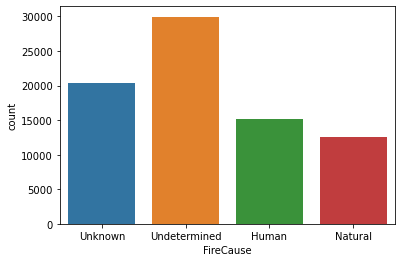

In [24]:
sns.countplot(x = 'FireCause', data=fires)

In [25]:
numerical_features_w = weather.select_dtypes(include=["number"])
numerical_features_w = numerical_features_w.drop(["LONGITUDE", "LATITUDE"], axis=1)
numerical_features_w.head()

,ELEVATION,CDSD,CLDD,DT00,DT32,DX32,DX70,DX90,EMNT,EMXT,HDSD,HTDD,TAVG,TMAX,TMIN
0,579.1,0.0,0.0,0.0,6.0,7.0,0.0,0.0,-6.1,11.1,NaN,423.9,3.48,4.73,2.23
1,579.1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.1,21.7,NaN,204.4,11.03,14.43,7.64
2,579.1,0.0,0.0,0.0,9.0,0.0,0.0,0.0,-3.9,18.9,NaN,374.8,6.24,9.56,2.92
3,579.1,0.3,0.3,0.0,0.0,0.0,4.0,0.0,3.3,22.2,NaN,197.3,11.77,15.80,7.74
4,579.1,23.1,22.8,0.0,0.0,0.0,13.0,0.0,3.3,29.4,NaN,133.5,14.76,19.31,10.21


In [26]:
numerical_features_f = fires.select_dtypes(include=["number"])
numerical_features_f = numerical_features_f.drop(["InitialLongitude", "InitialLatitude"], axis=1)
numerical_features_f.head()

,DiscoveryAcres,FinalAcres,IsFireCauseInvestigated,IsTrespass
0,0.10,NaN,NaN,NaN
1,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,0.0
3,0.10,NaN,NaN,0.0
4,0.01,NaN,NaN,NaN


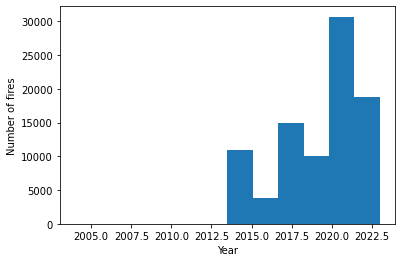

In [27]:
# Extract the year from the FireDiscoveryDateTime column
fires['Year'] = fires['FireDiscoveryDateTime'].dt.year
fires['month'] = fires['FireDiscoveryDateTime'].dt.month
fires['day'] = fires['FireDiscoveryDateTime'].dt.day  

# Count the number of fires in each year
fires_by_year = fires['Year'].value_counts()

# Create a histogram of the number of fires in each year
plt.hist(fires['Year'], bins=len(fires_by_year))
plt.xlabel('Year')
plt.ylabel('Number of fires')
plt.show()

In [28]:
# Drop rows with missing latitude or longitude values
fires = fires.dropna(subset=['InitialLatitude', 'InitialLongitude'])

In [29]:
# Create a map centered on the US
mapb = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Add a marker for each fire location
# for index, row in fires.iterrows():
#     folium.Marker([row['InitialLatitude'], row['InitialLongitude']]).add_to(map)

# Show the map
# map

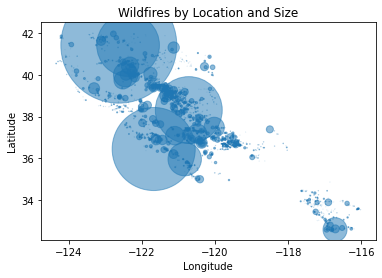

In [30]:
# Fire damage

plt.scatter(fires['InitialLongitude'], fires['InitialLatitude'], s=fires['FinalAcres'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Wildfires by Location and Size')
plt.show()

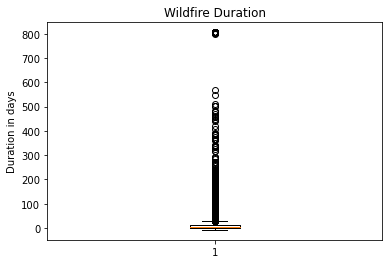

In [31]:
# Box Plot of Fire Duration
fires['duration'] = fires['FireOutDateTime'] - fires['FireDiscoveryDateTime']
plt.boxplot(fires['duration'].dt.days.dropna())
plt.ylabel('Duration in days')
plt.title('Wildfire Duration')
plt.show()

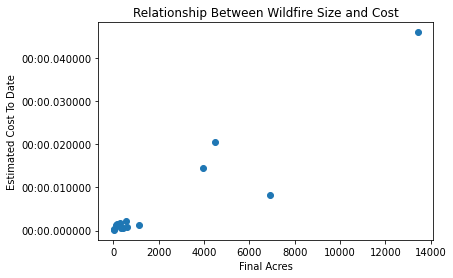

In [32]:
# Scatterplot to show cost vs acres of damage
subset = fires[['EstimatedCostToDate', 'FinalAcres']]

subset = subset.dropna()

# Create scatter plot
plt.scatter(subset['FinalAcres'], subset['EstimatedCostToDate'])
plt.xlabel('Final Acres')
plt.ylabel('Estimated Cost To Date')
plt.title('Relationship Between Wildfire Size and Cost')
plt.show()

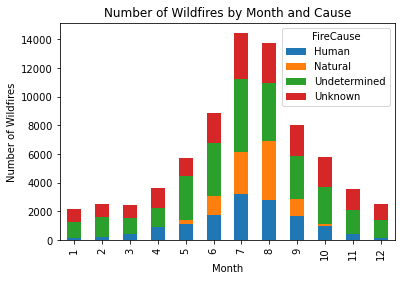

In [33]:
# Stacked bar graph to see wildfires by month and any seasonal patterns between the causes
subset = fires[['FireCause', 'FireDiscoveryDateTime']]

subset = subset.dropna()

grouped = subset.groupby([subset['FireDiscoveryDateTime'].dt.month, 'FireCause']).size().unstack()

grouped.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Number of Wildfires')
plt.title('Number of Wildfires by Month and Cause')
plt.show()

In [34]:
# Drop rows with missing latitude or longitude values
weather = weather.dropna(subset=['LATITUDE', 'LONGITUDE'])

In [35]:
fires['FireDiscoveryDateTime'] = fires['FireDiscoveryDateTime'].dt.tz_localize(None) #remove timezone

In [36]:
merged_df = pd.merge(fires, weather, how='left', left_on=['FireDiscoveryDateTime', 'InitialLongitude', 'InitialLatitude'], right_on=['DATE', 'LONGITUDE', 'LATITUDE'])

In [37]:
merged_df.head()

,ContainmentDateTime,ControlDateTime,DiscoveryAcres,EstimatedCostToDate,FinalAcres,FireBehaviorGeneral,FireBehaviorGeneral1,FireBehaviorGeneral2,FireBehaviorGeneral3,FireCause,FireCauseGeneral,FireCauseSpecific,FireDiscoveryDateTime,FireOutDateTime,GACC,IncidentName,IncidentShortDescription,InitialLatitude,InitialLongitude,IsFireCauseInvestigated,IsTrespass,POOCity,POOState,PredominantFuelModel,PrimaryFuelModel,Year,month,day,duration,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,DT00,DT00_ATTRIBUTES,DT32,DT32_ATTRIBUTES,DX32,DX32_ATTRIBUTES,DX70,DX70_ATTRIBUTES,DX90,DX90_ATTRIBUTES,EMNT,EMNT_ATTRIBUTES,EMXT,EMXT_ATTRIBUTES,HDSD,HDSD_ATTRIBUTES,HTDD,HTDD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,NaT,NaT,0.10,NaT,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,2020-02-28 20:45:40,NaT,OSCC,LAC-066100,NaN,33.808980,-118.180700,NaN,NaN,NaN,US-CA,NaN,NaN,2020,2,28,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaT,0.10,NaT,NaN,NaN,NaN,NaN,NaN,Undetermined,NaN,NaN,2021-11-25 15:17:32,NaT,OSCC,E 4TH ST /S D ST,NaN,33.782437,-117.228580,NaN,0.0,NaN,US-CA,NaN,NaN,2021,11,25,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaT,0.01,NaT,NaN,NaN,NaN,NaN,NaN,Undetermined,NaN,NaN,2022-11-21 11:25:33,NaT,OSCC,LAC-396331,NaN,33.941810,-118.309020,NaN,NaN,NaN,US-CA,NaN,NaN,2022,11,21,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaT,0.10,NaT,NaN,NaN,NaN,NaN,NaN,Undetermined,NaN,NaN,2017-08-27 14:33:32,NaT,NWCC,SILVIES RX,NaN,43.898380,-118.939900,NaN,0.0,NaN,US-OR,NaN,NaN,2017,8,27,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaT,0.10,NaT,NaN,NaN,NaN,NaN,NaN,Undetermined,NaN,NaN,2017-10-09 14:50:17,NaT,OSCC,LAC-302109,NaN,34.201481,-118.678009,NaN,NaN,NaN,US-CA,NaN,NaN,2017,10,9,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
